<a href="https://colab.research.google.com/github/dtoralg/IE_Calidad_ML/blob/main/Ejercicios/Modulo%205/Modulo_5_Ejercicio_5_CrossValidation_Resuelto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Ejercicio 5: ¿Cuán estable es tu modelo? Evalúa su rendimiento con validación cruzada (dataset balanceado)**
**Aplicación de Hold-out, KFold y StratifiedKFold en un problema de clasificación binaria con clases balanceadas**

### **Introducción**
En este ejercicio aprenderás a aplicar correctamente la **validación cruzada** para evaluar la estabilidad de un modelo y su capacidad de generalización. Usaremos un dataset con clases balanceadas para comprobar cómo la validación cruzada mejora la estimación del rendimiento comparado con una simple partición de entrenamiento/prueba. Analizaremos la variabilidad de métricas como **accuracy** y **F1 Score**, comparando los resultados de **Hold-out**, **KFold**, y **StratifiedKFold**.

In [13]:
# Celda 1: Carga de librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
sns.set(style='whitegrid')

In [14]:
# Celda 2: Cargar dataset balanceado
url = 'https://github.com/dtoralg/IE_Calidad_ML/raw/main/Data/control_calidad_piezas_metalicas.csv'
df = pd.read_csv(url)
df.head()

,ID_pieza,Temperatura,Presión_molde,Tiempo_inyección,Viscosidad_material,Humedad_ambiente,Energía_consumida,Operario_turno,Día_semana,Lote_producción,Desgaste_molde,Tiempo_desmoldeo,Ancho_pieza,Altura_pieza,Defecto
0,1,209.934283,1529.461844,6.030595,2.450860,39.217029,5.779265,Operario_3,Lunes,Lote_13,0.458149,3.688541,50.157288,101.279351,OK
1,2,197.234714,1480.767531,3.844645,3.121770,43.969118,9.031166,Operario_5,Viernes,Lote_6,0.505443,3.834900,59.949957,96.724974,KO
2,3,212.953771,1785.537227,5.575437,2.862635,43.672496,6.462271,Operario_4,Miércoles,Lote_14,0.597260,3.286921,43.763784,118.998853,KO
3,4,230.460597,1959.849342,4.380762,2.217833,33.957695,12.616841,Operario_5,Domingo,Lote_13,0.332967,3.305580,52.769876,115.421844,KO
4,5,195.316933,1706.054083,4.672597,1.591750,72.752929,10.004330,Operario_5,Lunes,Lote_17,0.565406,2.961457,46.792873,97.644322,OK


In [15]:
# Celda 3: Preparación de variables
X = df.drop(columns=['ID_pieza', 'Defecto'])
y = df['Defecto'].map({'OK': 0, 'KO': 1})

In [19]:
# Celda 4: Codificación, imputación y escalado
X = pd.get_dummies(X, drop_first=True)
imputer = SimpleImputer(strategy='median')
X_imputed = imputer.fit_transform(X)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

In [22]:
# Celda 5: Hold-out (train/test split)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
model = RandomForestClassifier(n_estimators=1000, random_state=42)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.51      0.50      0.50      5062
           1       0.49      0.50      0.49      4938

    accuracy                           0.50     10000
   macro avg       0.50      0.50      0.50     10000
weighted avg       0.50      0.50      0.50     10000



In [23]:
# Celda 6: Validación cruzada con KFold (5 particiones)
# Ten paciencia, este cálculo puede tardar > 20 min en Colab
kf = KFold(n_splits=3, shuffle=True, random_state=42)
f1_kf = cross_val_score(model, X_scaled, y, cv=kf, scoring='f1')
acc_kf = cross_val_score(model, X_scaled, y, cv=kf, scoring='accuracy')
print('F1 Score por fold (KFold):', f1_kf)
print('Accuracy por fold (KFold):', acc_kf)

F1 Score por fold (KFold): [0.50320033 0.47646434 0.48424157]
Accuracy por fold (KFold): [0.50170997 0.49751005 0.49627985]


In [26]:
# Celda 7: Validación cruzada con StratifiedKFold (3 particiones)
# Puede tardar > 20 min en Colab
skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
f1_skf = cross_val_score(model, X_scaled, y, cv=skf, scoring='f1')
acc_skf = cross_val_score(model, X_scaled, y, cv=skf, scoring='accuracy')
print('F1 Score por fold (StratifiedKFold):', f1_skf)
print('Accuracy por fold (StratifiedKFold):', acc_skf)

F1 Score por fold (StratifiedKFold): [0.48514488 0.49430676 0.49051309]
Accuracy por fold (StratifiedKFold): [0.49469011 0.50170997 0.49891996]


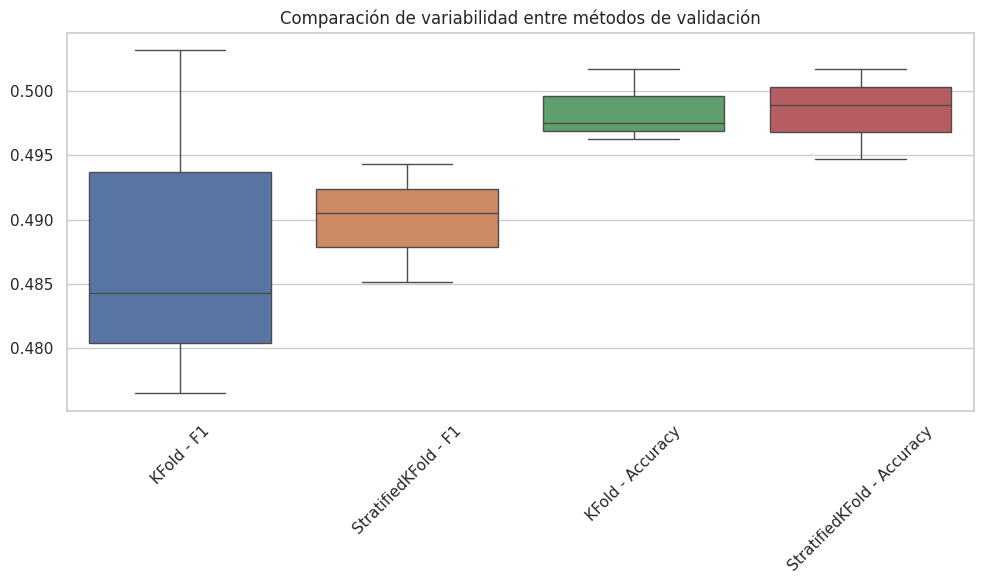

In [27]:
# Celda 8: Visualización con boxplots
df_cv = pd.DataFrame({
    'KFold - F1': f1_kf,
    'StratifiedKFold - F1': f1_skf,
    'KFold - Accuracy': acc_kf,
    'StratifiedKFold - Accuracy': acc_skf
})
plt.figure(figsize=(10,6))
sns.boxplot(data=df_cv)
plt.title('Comparación de variabilidad entre métodos de validación')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### **Conclusiones**
- En datasets **balanceados**, tanto KFold como StratifiedKFold ofrecen estimaciones consistentes del rendimiento.
- Aunque en este caso el desbalance no es un problema, **StratifiedKFold** sigue siendo una práctica recomendable.
- La comparación con `train_test_split` muestra que la validación cruzada **reduce la dependencia del azar** al evaluar modelos.

### **Preguntas para reflexionar**
- ¿Qué métrica muestra más variabilidad entre folds: F1 o Accuracy?
- ¿En qué casos podrías confiar solo en `train_test_split`?
- ¿Cuál sería una buena estrategia de validación si los datos fueran muy escasos?